**NB**: The project was conducted by **BOLARINWA AISHAT** in partial fulfilment of the requirements for the **ALX-T Data Analyst Udacity NanoDegree Program**

# Part II - Presentation:  [PROSPER]('https://www.prosper.com/') LOAN DATA EXPLANATION.
## by Bolarinwa Aishat

## Dataset Overview
 **Prosper Loan Data** : This [data set]('https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv') contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This [data dictionary]('https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&source=editors&ust=1666072219001097&usg=AOvVaw01_FnjF4p7Oc8-HzrgArFd') explains the variables in the data set.

## Key Insights for Presentation

 1) Number of borrowers from each city.

 2) Relationship between Income range and amount of loan taken.

 3) Effect of Prosper rating and Prosper score on the borrower's annual percentage rate (APR).

 4) Average amount of loan taken across various occupations.

 5) Prevalence of loan taking amongst various occupations.

In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [21]:
#Loading the dataset

df = pd.read_csv('ProsperLoanData.csv')

In [22]:
#After thorough assessment of the columns and the information they carry, 
#we will be selecting the ones necessary for our analysis.

df = df[['ListingNumber','Term','LoanStatus','BorrowerAPR','BorrowerRate','LenderYield','ProsperRating (Alpha)',
         'ProsperScore', 'ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus',
         'EmploymentStatusDuration','IsBorrowerHomeowner','IncomeRange','StatedMonthlyIncome',
         'LoanOriginalAmount','LoanOriginationDate']]
#Making a copy of the original data set
dff = df.copy()
#Dropping null values
dff = dff.dropna()

In [23]:
#Renaming columns for easier identification and simplicity

dff = dff.rename(columns = {'ProsperRating (Alpha)':'ProsperRating','ListingCategory (numeric)': 'ListingCategory',
            'IsBorrowerHomeowner': 'HomeOwner?'})

In [24]:
#Converting the LoanOriginationDate column to datetime

dff["LoanOriginationDate"] = dff["LoanOriginationDate"].astype('datetime64[ns]')

#Extracting year and month from date

dff['LoanOriginationMonth']= dff['LoanOriginationDate'].dt.month
dff['LoanOriginationYear'] = dff['LoanOriginationDate'].dt.year

In [25]:
#Converting the month numbers to month name

def month(LoanOriginationMonth):
    
    if LoanOriginationMonth == 1:
        return 'Jan'
    
    elif LoanOriginationMonth == 2:
        return 'Feb'
    
    elif LoanOriginationMonth == 3:
        return 'Mar'
    
    elif LoanOriginationMonth == 4:
        return 'Apr'
    
    elif LoanOriginationMonth == 5:
        return 'May'
    
    elif LoanOriginationMonth == 6:
        return 'Jun'
    elif LoanOriginationMonth == 7:
        return 'Jul'
    
    elif LoanOriginationMonth == 8:
        return 'Aug'
    
    elif LoanOriginationMonth == 9:
        return 'Sep'
    
    elif LoanOriginationMonth == 10:
        return 'Oct'
    
    elif LoanOriginationMonth == 11:
        return 'Nov'
    
    else:
        return 'Dec'
    
dff['LoanOriginationMonth']= dff['LoanOriginationMonth'].apply(month)

In [26]:
#Removing the LoanOriginationDate column

dff.drop('LoanOriginationDate',axis = 1, inplace=True)

In [27]:
#Changing the City codes to city name for better understanding

state_dict = {'CO': 'Colorado', 'GA': 'Georgia', 'MN': 'Minnesota', 'NM': 'New Mexico', 'KS': 'Kansas', 'CA': 'California',
              'IL': 'Illinois', 'MD': 'Maryland', 'AL': 'Alabama', 'AZ': 'Arizona', 'VA': 'Virginia','FL': 'Florida', 
              'PA': 'Pennsylvania', 'OR': 'Oregon', 'NY': 'New York', 'LA': 'Louisiana', 'WI': 'Wisconsin',
              'OH': 'Ohio', 'NC': 'North Carolina', 'WA': 'Washington', 'MI': 'Michigan', 'NV': 'Nevada','NJ': 'New Jersey', 
              'TX': 'Texas', 'AR': 'Arkansas', 'SC': 'South Carolina', 'DE': 'Delaware', 'UT': 'Utah', 
              'DC': 'District of Columbia', 'MA': 'Massachusetts', 'MO': 'Missouri', 'CT': 'Connecticut', 'IN': 'Indiana',
              'KY': 'Kentucky', 'OK': 'Oklahoma', 'MS': 'Mississippi', 'WV': 'West Virginia', 'RI': 'Rhode Island', 
              'TN': 'Tennessee', 'ID': 'Idaho', 'HI': 'Hawaii', 'NH': 'New Hampshire', 'NE': 'Nebraska', 'WY': 'Wyoming',
              'AK': 'Alaska', 'MT': 'Montana', 'VT': 'Vermont', 'SD': 'South Dakota'}

dff['BorrowerState'] = dff['BorrowerState'].map(state_dict)

In [28]:
#Converting the numbers in the ListingCategory to actual categories

def listing(ListingCategory):
    
    if ListingCategory == 0:
        return 'Not Available'
    
    elif ListingCategory == 1:
        return 'Debt Consolidation'
    
    elif ListingCategory == 2:
        return 'Home Improvement'
    
    elif ListingCategory == 3:
        return 'Business'
    
    elif ListingCategory == 4:
        return 'Personal Loan'
    
    elif ListingCategory == 5:
        return 'Student Use'
    
    elif ListingCategory == 6:
        return 'Auto'
    
    elif ListingCategory == 7:
        return 'Other'
    
    elif ListingCategory == 8:
        return 'Baby&Adoption'
    
    elif ListingCategory == 9:
        return 'Boat'
    
    elif ListingCategory == 10:
        return 'Cosmetic Procedure'
    
    elif ListingCategory == 11:
        return 'Engagement Ring'
    
    elif ListingCategory == 12:
        return 'Green Loans'
    
    elif ListingCategory == 13:
        return 'Household Expenses'
    
    elif ListingCategory == 14:
        return 'Large Purchases'
    
    elif ListingCategory == 15:
        return 'Medical/Dental'
    
    elif ListingCategory == 16:
        return 'Motorcycle'
    
    elif ListingCategory == 17:
        return 'RV'
    
    elif ListingCategory == 18:
        return 'Taxes'
    
    elif ListingCategory == 19:
        return 'Vacation'
    
    else:
        return 'Wedding Loans'
    
dff['ListingCategory']= dff['ListingCategory'].apply(listing)

In [29]:
#Converting the above columns to categorical data types

ordinal_var_dict = {'Term': [12, 36, 60],
                    'LoanStatus': ['Current', 'Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)', 
                                   'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)', 
                                   'FinalPaymentInProgress','Defaulted','Chargedoff', 'Completed'],
                   'ProsperRating': ['AA', 'A','B', 'C', 'D', 'E', 'HR'],
                   'ProsperScore': [ 1., 2., 3., 4., 5., 6., 7., 8.,  9., 10., 11.],
                   'ListingCategory': ['Home Improvement', 'Motorcycle', 'Debt Consolidation', 'Other','Household Expenses',
                                       'Auto', 'Medical/Dental', 'Wedding Loans','Vacation', 'Taxes', 'Business', 
                                       'Baby&Adoption','Engagement Ring', 'Large Purchases', 'Boat', 'RV',
                                       'Cosmetic Procedure', 'Not Available', 'Student Use','Green Loans'],
                   'EmploymentStatus': ['Employed',  'Full-time','Part-time', 'Self-employed', 
                                        'Retired','Not employed',  'Other',],
                   'HomeOwner?': [True, False],
                   'IncomeRange': ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', 
                                   '$100,000+'],
                   'LoanOriginationMonth': ['Jan', 'Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
                                            'Oct', 'Nov', 'Dec'],
                   'LoanOriginationYear': [2009, 2010, 2011, 2012, 2013, 2014]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    dff[var] = dff[var].astype(ordered_var)

In [30]:
#Converting BorrowerAPR, BorrowerRate and LenderYield to percentage

dff['BorrowerAPR'] = (dff['BorrowerAPR']*100).round(2)
dff['BorrowerRate'] = (dff['BorrowerRate']*100).round(2)
dff['LenderYield'] = (dff['LenderYield']*100).round(2)

## (Visualization 1)

 We want to check the cities with the highest number of loan takers.

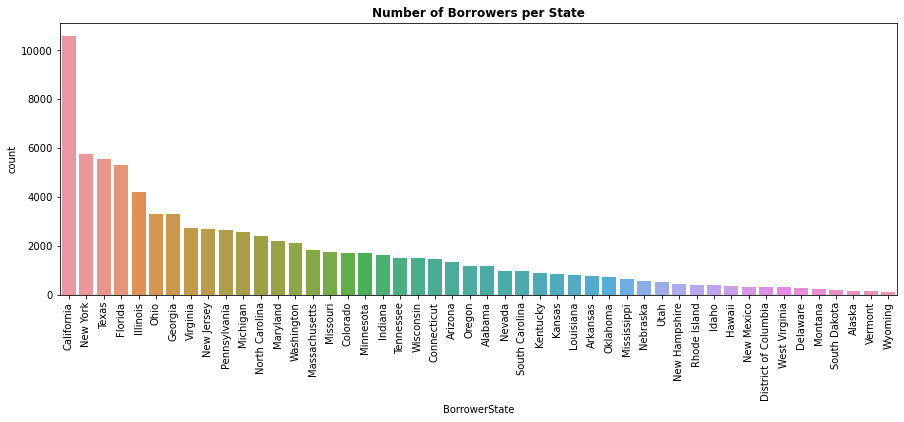

In [31]:
fig = plt.figure(figsize=(15, 5))
sns.countplot(data = dff, x='BorrowerState', order = dff['BorrowerState'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Borrowers per State', fontweight = 'bold');

 As seen in the bar chart above, California is the state with the highest number of borrowers. Recall that the data set was gotten from Prosper, a San Francisco, California-based company, It is understandable if most of the borrowers are from the same city as their headquarters. Other cities with large number of borrowers include New york, Texas, Florida, Illinois etc. Ohio and Georgia have eaqual number of borrowers.   
Further research from [this source]('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States') shows that the above named cities are among the most populated cities in the United States of America.

## (Visualization 2)

 Let's find out how the income range of a borrower affect the amount of loan they take!

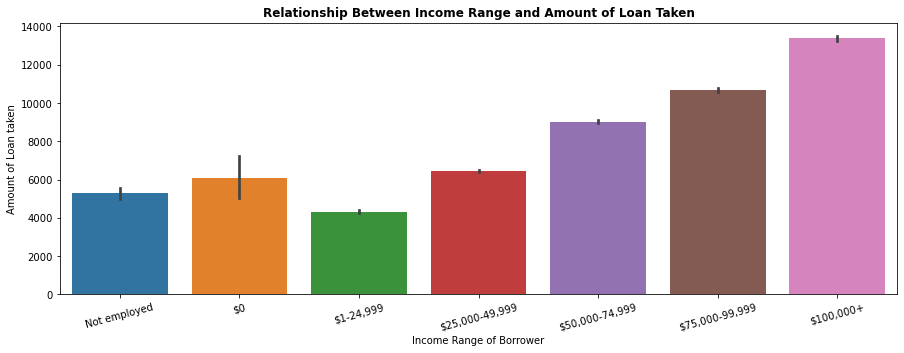

In [32]:
plt.figure(figsize=[15,5])
orders = dff.groupby(['IncomeRange'])['LoanOriginalAmount'].mean().index
sns.barplot(data = dff, x='IncomeRange', y='LoanOriginalAmount',order = orders)
plt.ylabel('Amount of Loan taken')
plt.xlabel('Income Range of Borrower')
plt.title('Relationship Between Income Range and Amount of Loan Taken', fontweight = 'bold')
plt.xticks(rotation=15)
plt.show()

 Comparing the income range of the borrower and the amount of loan taken, there is a general direct proportionality. The highest income earners took the highest amount of loan. It is worthy of note that the average amount of loan taken by unemployed borrowers is higher that those who earn between one dollar to twenty four thousand, nine hundred and ninety nine dollars (1- 24,999) which is different from the general trend observed. Also, borrowers that fall under the zero dollar income range category took higher amount of loans that the unemployed borrowers.

## (Visualization 3)

 How does ProsperScore and ProsperRating affect the BorrowerAPR?

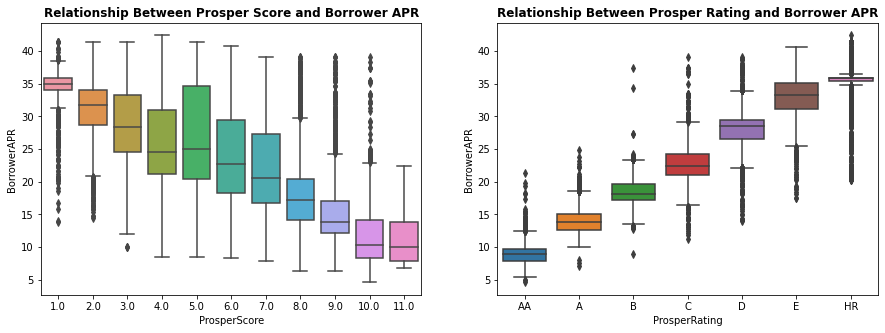

In [33]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.boxplot(data = dff, x = 'ProsperScore', y = 'BorrowerAPR')
plt.title('Relationship Between Prosper Score and Borrower APR', fontweight = 'bold')

plt.subplot(1,2,2)
sns.boxplot(data = dff, x='ProsperRating', y='BorrowerAPR')
plt.title('Relationship Between Prosper Rating and Borrower APR', fontweight = 'bold');

 As the prosper score increases from 1 to 11 with 1 being the least and 11 being the highest score, the borrower's annual percentage rate reduces. This means that those who score high will get lower interest on their loan compared to those who have low prosper score. This is an inverse relationship. To reduce the amount of interest to be paid on loans, users should strive to get higher prosper score.  
Similarly, borrowers with good prosper ratings like AA, A and B get to pay lower interest than those with poor ratings like HR and E pay high interest on loans.

##  (Visualization 4)
 Which Occupation take the highest amount of loan?

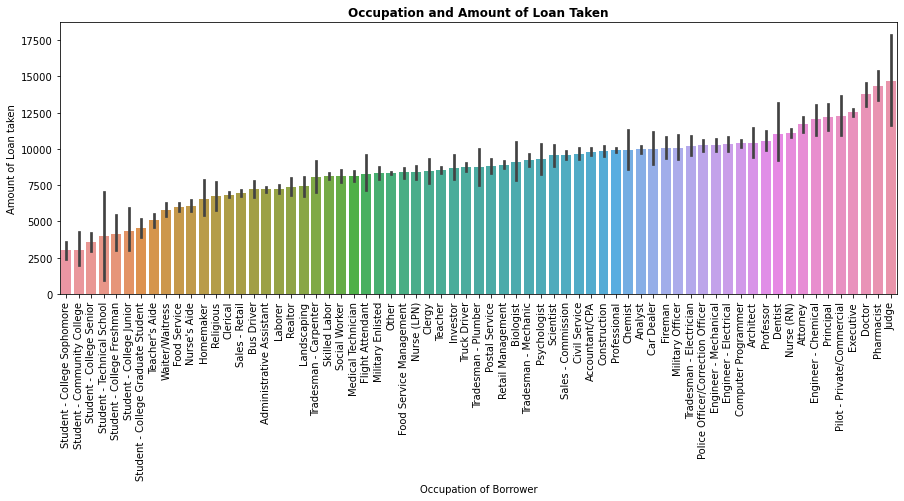

In [34]:
plt.figure(figsize=[15,5])
orders = dff.groupby(['Occupation'])['LoanOriginalAmount'].mean().sort_values().index
sns.barplot(data = dff, x='Occupation', y='LoanOriginalAmount',order = orders)
plt.ylabel('Amount of Loan taken')
plt.xlabel('Occupation of Borrower')
plt.title('Occupation and Amount of Loan Taken', fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()

 **Wow!!** What a discovery! Judges, Pharmacists and Doctor's take the highest amount of loan on the prosper platform and students take the least amount of loan. The fact that judges, pharmacists and doctors are high income earners and we've established that higher income range goes hand in hand with high amount of loan justisfies this discovery.

## (Visualization 5)
 Prevalence of loan taking amongst various Occupation.

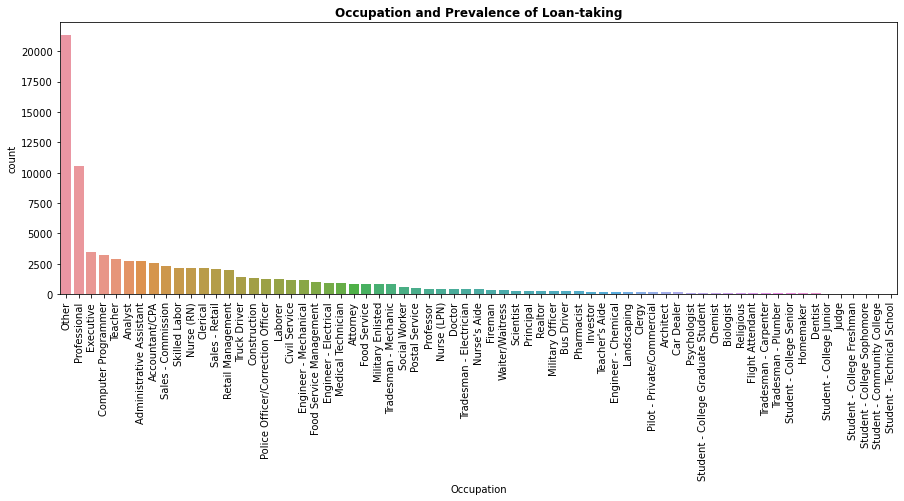

In [35]:
fig = plt.figure(figsize=(15, 5))
sns.countplot(data = dff, x='Occupation', order = dff['Occupation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Occupation and Prevalence of Loan-taking', fontweight = 'bold');

 Again, students take loan least frequently and borrowers whose occupation fall under the 'other' category are the most prevalent loan takers. Notice how the frequency of loan taking amongst judges, pharmacists and doctors is very low yet they take the highest amount as loan. This just implies that judges, pharmacists or doctors in the United states seldom take loan but when they do, they are accorded a large amount since their job/career path gives very reliable income stream and lenders can be rest assured that defaulters will rarely come from this group. 

# THANK YOU!

In [37]:
### Create HTML slides without showing the code:
!jupyter nbconvert Part_II_explanation_template.ipynb --to slides --no-input

[NbConvertApp] Converting notebook Part_II_explanation_template.ipynb to slides
[NbConvertApp] Writing 854460 bytes to Part_II_explanation_template.slides.html
